# Quel type de champignon est vénéneux
---
Tout d'abord j'importe les librairies de bases et les données

In [331]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

mushrooms = pd.read_csv('mushrooms.csv')
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Définission des valeures
---
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [326]:
mushrooms.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5744,p,f,y,b,t,n,f,c,b,g,...,s,w,w,p,w,t,p,r,v,m
2240,e,x,y,e,t,n,f,c,b,w,...,s,w,g,p,w,o,p,n,y,d
1205,e,f,s,n,f,n,f,w,b,h,...,s,w,w,p,w,o,e,n,a,g
5938,e,k,s,p,t,n,f,c,b,e,...,s,e,e,p,w,t,e,w,c,w
6852,p,f,y,n,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d


In [327]:
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [328]:
mushrooms['class'].value_counts()*100/len(mushrooms)

e    51.797144
p    48.202856
Name: class, dtype: float64

In [329]:
mushrooms.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Nettoyage
---
J'ai choisis de prendre les informations, qui, à mon sens, peuvent être visible rapidement par une personne. A partir de ces informations, que sont :
- l'odeur
- la forme du chapeau
- la surface du chapeau
- la couleur du chapeau
- la présence de tâches sur le chapeau
- la couleur du sous chapeau
- la population
- l'habitat

J'ai donc regardé, dans ces données, lesquelles, avec le fait que le champignon soit vénéneu, étaient les plus corrélé :
- l'odeur
- la forme du chapeau
- la présence de tâches sur le chapeau
- la population
- l'habitat

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: poisonous, Length: 8124, dtype: int64


<AxesSubplot:xlabel='population', ylabel='poisonous'>

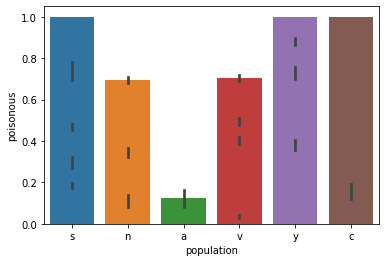

In [333]:
mushrooms['poisonous'] = mushrooms['class'] == 'p'
mushrooms['poisonous'] = mushrooms['poisonous'] * 1
print(mushrooms['poisonous'])
sns.barplot(x='odor', y='poisonous', data=mushrooms)
sns.barplot(x='cap-shape', y='poisonous', data=mushrooms)
sns.barplot(x='bruises', y='poisonous', data=mushrooms)
sns.barplot(x='habitat', y='poisonous', data=mushrooms)
sns.barplot(x='population', y='poisonous', data=mushrooms)

## Modification
---
Je modifie le type des valeurs des données pour pouvoir les traiter.

- l'odeur : n->0, l->1, c->2, y->3, f->4, m->5, a->6, p->7, s->8
- la forme du chapeau : b->0, c->1, x->2, f->3, k->4, s->5
- la présence de tâches sur le chapeau : t->1, f->0
- la population : a->0, c->1, n->2, s->3, v->4, y->5
- l'habitat : g->0, l->1, m->2, p->3, u->4, w->5, d->6

In [334]:
mushrooms = pd.read_csv('mushrooms.csv')

mushrooms['poisonous'] = mushrooms['class'] == 'p'

odors = {
    'n': 0,
    'l': 1,
    'c': 2,
    'y': 3,
    'f': 4,
    'm': 5,
    'a': 6,
    'p': 7,
    's': 8
}
mushrooms['odor'] = [odors[i] for i in mushrooms['odor']]

shapes = {
    'b': 0,
    'c': 1,
    'x': 2,
    'f': 3,
    'k': 4,
    's': 5
}
mushrooms['cap-shape'] = [shapes[i] for i in mushrooms['cap-shape']]

bruises = {
    'f': 0,
    't': 1
}
mushrooms['bruises'] = [bruises[i] for i in mushrooms['bruises']]

population = {
    'a': 0,
    'c': 1,
    'n': 2,
    's': 3,
    'v': 4,
    'y': 5
}
mushrooms['population'] = [population[i] for i in mushrooms['population']]

habitats = {
    'g': 0,
    'l': 1,
    'm': 2,
    'p': 3,
    'u': 4,
    'w': 5,
    'd': 6
}
mushrooms['habitat'] = [habitats[i] for i in mushrooms['habitat']]

X=mushrooms[['odor','cap-shape','bruises','population','habitat', 'poisonous']]
y=X['poisonous'].copy()
del X['poisonous']
#reg = LinearRegression(normalize=True,fit_intercept=True).fit(X, y)
#reg = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0).fit(X, y)
#reg.score(X, y)


In [335]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)


cls=GradientBoostingClassifier().fit(x_train,y_train)

cls.score(x_val,y_val)

0.9987692307692307

## Compilation
---


In [347]:
filename = 'mushrooms.pkl'
mushrooms['poisonous'] = mushrooms['poisonous'] * float(1)
pickle.dump(cls, open(filename, 'wb'))

In [348]:
reg = pickle.load(open(filename, 'rb'))

from sklearn import svm, datasets

odor = 2.0
cap_shap = 2.0
bruises = 2.0
population = 2.0
habitat = 2.0

my_array = np.array([[odor, cap_shap, bruises, population, habitat]])

predict = reg.predict(my_array)
predict[0]

True